In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
coordinates = pd.read_csv('coordinates.csv', index_col=0)
devaucouleurs = pd.read_csv('devaucouleurs.csv', index_col=0)
exponential = pd.read_csv('exponential.csv', index_col=0)
extinction = pd.read_csv('extinction.csv', index_col=0)
fiber = pd.read_csv('fiber.csv', index_col=0)
flags = pd.read_csv('flags.csv', index_col=0)
isophotal = pd.read_csv('isophotal.csv', index_col=0)
m = pd.read_csv('m.csv', index_col=0)
model = pd.read_csv('model.csv', index_col=0)
object_info = pd.read_csv('object_info.csv', index_col=0)
petro = pd.read_csv('petro.csv', index_col=0)
position = pd.read_csv('position.csv', index_col=0)
prof = pd.read_csv('prof.csv', index_col=0)
psf = pd.read_csv('psf.csv', index_col=0)
signal = pd.read_csv('signal.csv', index_col=0)
sky = pd.read_csv('sky.csv', index_col=0)
stokes = pd.read_csv('stokes.csv', index_col=0)
target = pd.read_csv('target.csv', index_col=0)
texture = pd.read_csv('texture.csv', index_col=0)
types = pd.read_csv('types.csv', index_col=0)

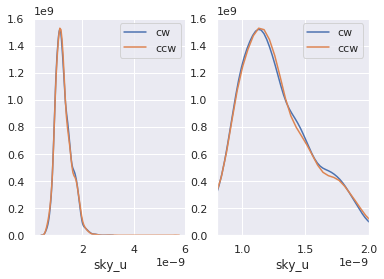

In [3]:
plt.subplot(121)
sns.distplot(sky[sky['rotation'] == 'cw']['sky_u'], label='cw', hist=False, kde=True)
sns.distplot(sky[sky['rotation'] == 'ccw']['sky_u'], label='ccw', hist=False, kde=True)
plt.subplot(122)
sns.distplot(sky[sky['rotation'] == 'cw']['sky_u'], label='cw', hist=False, kde=True)
sns.distplot(sky[sky['rotation'] == 'ccw']['sky_u'], label='ccw', hist=False, kde=True)
plt.xlim(8e-10, 2e-9)
#plt.xlim()
plt.show()

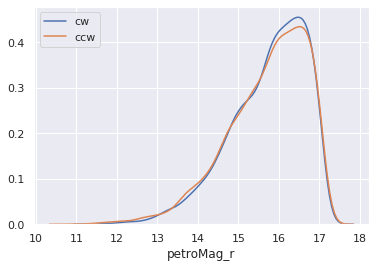

In [4]:
sns.distplot(petro[petro['rotation'] == 'cw']['petroMag_r'], label='cw', hist=False, kde=True)
sns.distplot(petro[petro['rotation'] == 'ccw']['petroMag_r'], label='ccw', hist=False, kde=True)
plt.show()

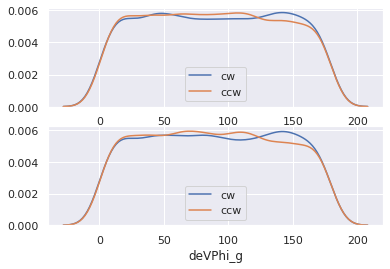

In [5]:
plt.subplot(211)
sns.distplot(exponential[exponential['rotation'] == 'cw']['expPhi_g'], label='cw', hist=False, kde=True)
sns.distplot(exponential[exponential['rotation'] == 'ccw']['expPhi_g'], label='ccw', hist=False, kde=True)

plt.subplot(212)
sns.distplot(devaucouleurs[devaucouleurs['rotation'] == 'cw']['deVPhi_g'], label='cw', hist=False, kde=True)
sns.distplot(devaucouleurs[devaucouleurs['rotation'] == 'ccw']['deVPhi_g'], label='ccw', hist=False, kde=True)

plt.show()

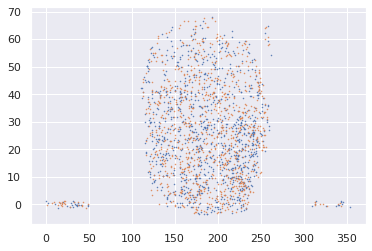

In [6]:
plt.plot('ra', 'dec', data=coordinates[coordinates['rotation'] == 'cw'].sample(1000), linestyle='', marker='o', markersize=0.5, label='cw')
plt.plot('ra', 'dec', data=coordinates[coordinates['rotation'] == 'ccw'].sample(1000), linestyle='', marker='o', markersize=0.5, label='ccw')
plt.show()

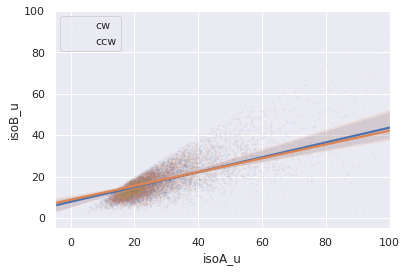

In [37]:
#iso_sampled = isophotal.sample(1000)
iso_cw = isophotal[isophotal['rotation'] == 'cw']
iso_ccw = isophotal[isophotal['rotation'] == 'ccw']
ax = sns.regplot(x=iso_cw[iso_cw['rotation'] == 'cw']['isoA_u'], y=iso_cw[iso_cw['rotation'] == 'cw']['isoB_u'], 
            label='cw', scatter_kws={'alpha':0.05, 's':1})
ax = sns.regplot(x=iso_ccw[iso_ccw['rotation'] == 'ccw']['isoA_u'], y=iso_ccw[iso_ccw['rotation'] == 'ccw']['isoB_u'], 
            label='ccw', scatter_kws={'alpha':0.05, 's':1})
plt.xlim(-5, 100)
plt.ylim(-5, 100)
plt.legend()
plt.show()

In [8]:
iso_ratios = isophotal[['rotation']]
iso_ratios['uband'] = isophotal['isoA_u'] / isophotal['isoB_u']
iso_ratios['gband'] = isophotal['isoA_g'] / isophotal['isoB_g']
iso_ratios['rband'] = isophotal['isoA_r'] / isophotal['isoB_r']
iso_ratios['iband'] = isophotal['isoA_i'] / isophotal['isoB_i']
iso_ratios['zband'] = isophotal['isoA_z'] / isophotal['isoB_z']
iso_ratios.head()

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,rotation,uband,gband,rband,iband,zband
0,cw,1.122510,1.499988,1.637823,1.546191,1.350384
1,cw,1.612732,1.476886,1.496899,1.431871,1.488925
2,cw,1.510335,1.329247,1.238387,1.358827,1.257137
3,cw,3.027444,1.433293,1.428008,1.495110,1.796855
4,cw,1.691757,1.227176,1.149103,1.167579,1.185834


/home/rashmi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/rashmi/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


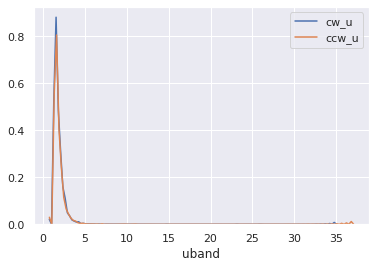

In [9]:
sns.distplot(iso_ratios[iso_ratios['rotation'] == 'cw']['uband'], label='cw_u', hist=False, kde=True)
sns.distplot(iso_ratios[iso_ratios['rotation'] == 'ccw']['uband'], label='ccw_u', hist=False, kde=True)
plt.show()

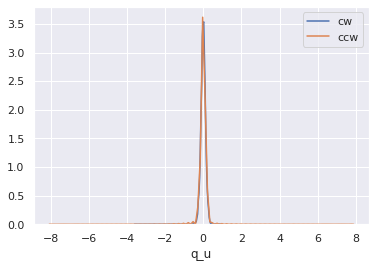

In [10]:
sns.distplot(stokes[stokes['rotation'] == 'cw']['q_u'], label='cw', hist=False, kde=True)
sns.distplot(stokes[stokes['rotation'] == 'ccw']['q_u'], label='ccw', hist=False, kde=True)
#plt.xlim(-0.05, 0.05)
plt.show()